# Loading Data

In [327]:
import numpy as np
import pandas as pd

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

%pip install sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [253]:

yellow_taxi_df = pd.read_parquet('yellow_tripdata_2024-11.parquet')

# Data Exploration

In this section, we will explore the 'Green Taxi' dataset and understand its characteristics and data.

In [254]:
yellow_taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0000,1.9300,1.0000,N,239,262,2,-12.8000,-1.0000,-0.5000,0.0000,0.0000,-1.0000,-17.8000,-2.5000,0.0000
1,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0000,1.9300,1.0000,N,239,263,2,12.8000,1.0000,0.5000,0.0000,0.0000,1.0000,17.8000,2.5000,0.0000
2,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1.0000,34.3000,5.0000,N,219,265,1,259.0000,0.0000,0.0000,15.0000,0.0000,1.0000,275.0000,0.0000,0.0000
3,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2.0000,0.9300,1.0000,N,186,107,1,10.0000,1.0000,0.5000,1.0000,0.0000,1.0000,16.0000,2.5000,0.0000
4,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1.0000,0.3800,1.0000,N,79,79,1,6.5000,1.0000,0.5000,1.0000,0.0000,1.0000,12.5000,2.5000,0.0000


In [255]:
yellow_taxi_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3646364,2,2024-11-30 23:11:15,2024-11-30 23:19:33,NaN,1.0900,NaN,None,162,142,0,1.0000,0.0000,0.5000,0.0000,0.0000,1.0000,5.0000,NaN,NaN
3646365,1,2024-11-30 23:49:30,2024-12-01 00:27:39,NaN,20.1000,NaN,None,132,238,0,70.0000,0.0000,0.5000,8.0900,6.9400,1.0000,89.0300,NaN,NaN
3646366,2,2024-11-30 23:31:46,2024-12-01 00:04:32,NaN,1.3800,NaN,None,100,230,0,18.7100,0.0000,0.5000,0.0000,0.0000,1.0000,22.7100,NaN,NaN
3646367,2,2024-11-30 23:41:21,2024-11-30 23:53:20,NaN,2.6300,NaN,None,42,75,0,13.2600,0.0000,0.5000,0.0000,0.0000,1.0000,14.7600,NaN,NaN
3646368,2,2024-11-30 23:21:52,2024-11-30 23:31:11,NaN,1.1600,NaN,None,116,42,0,-0.5000,0.0000,0.5000,0.0000,0.0000,1.0000,1.0000,NaN,NaN


In [256]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [257]:
print(yellow_taxi_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [258]:
# supress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format

yellow_taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3646369,3646369,3646369,3272695,3646369,3272695,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3272695,3272695
mean,2,2024-11-15 17:27:55.648361,2024-11-15 17:45:42.936777,1,5,2,165,164,1,19,1,0,3,1,1,28,2,0
min,1,2002-12-31 22:17:43,2002-12-31 22:23:55,0,0,1,1,1,0,-1458,-8,-0,-94,-141,-1,-1478,-2,-2
25%,2,2024-11-08 16:43:32,2024-11-08 17:05:55,1,1,1,132,113,1,9,0,0,0,0,1,16,2,0
50%,2,2024-11-15 19:11:36,2024-11-15 19:28:02,1,2,1,162,162,1,14,1,0,3,0,1,21,2,0
75%,2,2024-11-22 16:02:55,2024-11-22 16:23:55,1,3,1,234,234,1,23,2,0,4,0,1,30,2,0
max,6,2024-12-01 22:04:33,2024-12-01 23:10:54,9,398609,99,265,265,4,335544,14,41,572,141,1,335551,2,2
std,0,NaN,NaN,1,539,11,65,69,1,177,2,0,4,2,0,177,1,0


There are several key points we can observe and understand from the table above:
- The data spans from the year 2002 to 2024.
- The maximum number of passenger in a yellow cab is only 6 passengers, yet the maximum of passenger_count shown is 9.
- The maximum trip distance in this dataset is 398,609 miles, which is illogical for a taxi trip.
- The minimum fare amount is -$1458, which indicates the existence of voided/refunded transactions in this dataset. This can be observed in other variables including 'extra','mta_tax','tip_amount' and other related financial data as well.

Some of these key points will be handled Outliers section. But firstly, we will start by removing columns that are irrelevant to the project.

### Removing Columns

The following list is the columns that will be removed:
- VendorID
- RatecodeID
- store_and_fwd_flag
- LocationID(s)
- payment_type
- fare_amount
- mta_tax
- tip_amount
- tolls_amount
- improvement_surcharge
- total_amount
- airport_fee

These columns does not show relevance to the target variable (Trip duration).

In [259]:
irrelevant_cols = [
    'VendorID','RatecodeID','store_and_fwd_flag',
    'PULocationID','DOLocationID','payment_type','fare_amount','mta_tax',
    'tip_amount','tolls_amount','improvement_surcharge','total_amount','Airport_fee'
]

for column in irrelevant_cols:
   yellow_taxi_df.drop(column, axis=1, inplace=True)
   print(f'{column} has been dropped.')

VendorID has been dropped.
RatecodeID has been dropped.
store_and_fwd_flag has been dropped.
PULocationID has been dropped.
DOLocationID has been dropped.
payment_type has been dropped.
fare_amount has been dropped.
mta_tax has been dropped.
tip_amount has been dropped.
tolls_amount has been dropped.
improvement_surcharge has been dropped.
total_amount has been dropped.
Airport_fee has been dropped.


In [260]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   extra                  float64       
 5   congestion_surcharge   float64       
dtypes: datetime64[us](2), float64(4)
memory usage: 166.9 MB


Checking NaN values in all attributes

In [261]:
percent_missing = yellow_taxi_df.isnull().sum() / len(yellow_taxi_df) * 100
print(percent_missing)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count         10
trip_distance            0
extra                    0
congestion_surcharge    10
dtype: float64


The percentage of missing values in 'passenger_count' and 'congestion_surcharge' are both 10%. This is a slightly significant amount of missing values (>5%), thus we must handle these missing data carefully.

Checking Duplicates

In [262]:
# Check for duplicate rows
duplicates = yellow_taxi_df.duplicated()

# count total number of duplicates
num_of_duplicates = duplicates.sum()
print(f'Total number of duplicate rows: {num_of_duplicates}')
print(f'Percentage of duplicate rows in dataset:{num_of_duplicates / len(yellow_taxi_df) * 100}%')

yellow_taxi_df[duplicates]

Total number of duplicate rows: 4833
Percentage of duplicate rows in dataset:0.13254281176699342%


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,extra,congestion_surcharge
1384,2024-11-01 00:25:39,2024-11-01 00:25:50,1,0,0,0
7313,2024-11-01 01:31:28,2024-11-01 02:02:31,1,19,0,0
10319,2024-11-01 02:10:19,2024-11-01 02:12:09,1,1,0,0
10871,2024-11-01 02:18:56,2024-11-01 02:19:17,1,0,0,0
11011,2024-11-01 02:10:06,2024-11-01 02:10:34,2,0,0,0
...,...,...,...,...,...,...
3266749,2024-11-30 22:35:36,2024-11-30 23:07:50,1,20,0,0
3271630,2024-11-30 23:23:48,2024-11-30 23:53:42,2,19,0,0
3272260,2024-11-30 23:18:59,2024-11-30 23:45:12,2,13,0,0
3436641,2024-11-15 17:12:28,2024-11-15 17:32:49,NaN,0,0,NaN


From above, there are 287,456 rows of which are duplicates. This is about 9% of the whole dataset. In machine learning, we must eliminate duplicate rows to avoid negative impacts on the model performance. Moreover, they also present risk of bias!

In [263]:
yellow_taxi_df.drop_duplicates(inplace=True)

In [264]:
# Check again for duplicate rows
duplicates = yellow_taxi_df.duplicated()
num_of_duplicates = duplicates.sum()
print(f'Total number of duplicate rows now: {num_of_duplicates}')

Total number of duplicate rows now: 0


Correlation

<Axes: >

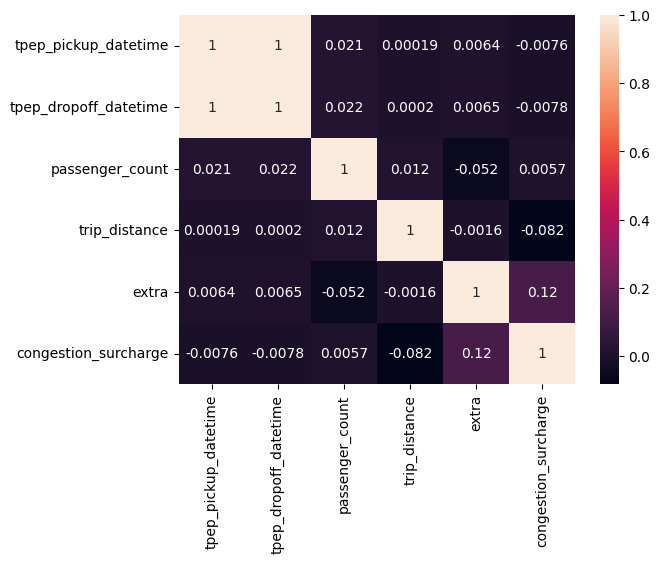

In [265]:
correlation = yellow_taxi_df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

As you can see, there aren't exactly any correlations since our target variable (trip duration) is not created yet. Thus, let's create the new Feature using two features 'tpep_pickup_datetime' and 'tpep_dropoff_datetime'.

### Creating 'Trip Duration' Feature

In [266]:
yellow_taxi_df['trip_duration_in_mins'] = (yellow_taxi_df['tpep_dropoff_datetime'] - yellow_taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60

yellow_taxi_df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,extra,congestion_surcharge,trip_duration_in_mins
0,2024-11-01 00:46:24,2024-11-01 00:57:17,1,2,-1,-2,11
1,2024-11-01 00:46:24,2024-11-01 00:57:17,1,2,1,2,11
2,2024-11-01 00:37:36,2024-11-01 01:28:36,1,34,0,0,51
3,2024-11-01 00:12:55,2024-11-01 00:22:17,2,1,1,2,9
4,2024-11-01 00:54:45,2024-11-01 00:59:47,1,0,1,2,5
5,2024-11-01 00:19:00,2024-11-01 00:21:28,1,0,1,2,2
6,2024-11-01 00:42:45,2024-11-01 00:56:23,2,3,1,0,14
7,2024-11-01 00:30:10,2024-11-01 00:37:28,1,3,1,2,7
8,2024-11-01 00:44:14,2024-11-01 00:49:12,1,1,1,0,5
9,2024-11-01 00:05:05,2024-11-01 00:13:12,2,1,1,2,8


In [267]:
yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,extra,congestion_surcharge,trip_duration_in_mins
147467,2024-11-02 09:15:00,2024-11-02 09:08:42,1,1,0,0,-6
199646,2024-11-02 17:30:00,2024-11-02 17:29:12,1,1,0,0,-1
251078,2024-11-03 01:48:08,2024-11-03 01:05:36,0,4,4,2,-43
251089,2024-11-03 01:56:34,2024-11-03 01:36:50,1,8,4,2,-20
251110,2024-11-03 01:56:38,2024-11-03 01:09:30,1,2,1,2,-47
...,...,...,...,...,...,...,...
3614630,2024-11-27 08:11:47,2024-11-27 08:11:15,NaN,5,0,NaN,-1
3616333,2024-11-27 13:11:30,2024-11-27 13:11:23,NaN,5,0,NaN,-0
3626879,2024-11-28 15:11:25,2024-11-28 15:11:16,NaN,2,0,NaN,-0
3634898,2024-11-29 02:11:46,2024-11-29 02:11:43,NaN,9,0,NaN,-0


The statistics above show the existence of negative values in 'trip_duration_in_mins', which is impossible in nature. Thus, we need to decide the next step for these rows.

In [268]:
print(f"Percentage of Rows with Negative Values in 'trip_duration_in_mins': {len(yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'trip_duration_in_mins': 0.029602892845216965


Since the percentage of rows with negative values in 'trip_duration_in_mins' is very small and insignificant, it is acceptable to remove them.

In [269]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] >= 0]

print(f"Percentage of Rows with Negative Values in 'trip_duration_in_mins': {len(yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'trip_duration_in_mins': 0.0


In [270]:
yellow_taxi_df['trip_duration_in_mins'].describe()

count   3640458
mean         18
std          33
min           0
25%           8
50%          13
75%          22
max        5751
Name: trip_duration_in_mins, dtype: float64

<Axes: xlabel='trip_duration_in_mins'>

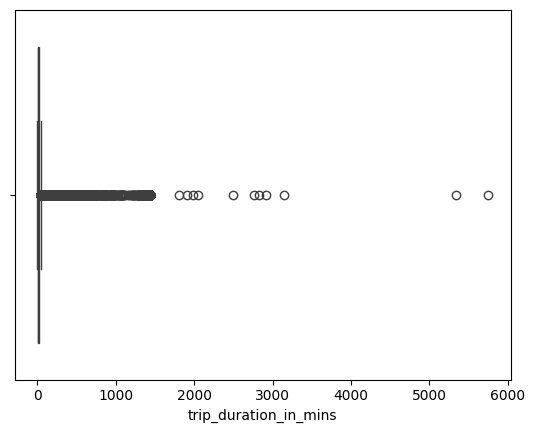

In [271]:
sns.boxplot(x=yellow_taxi_df['trip_duration_in_mins'])

As you can see from 

#### Capping Outliers in 'trip_duration_in_mins'

The long tails in the boxplot figure above indicates large skewness, thus, the outliers will be capped using the IQR method instead of using Z-score.

In [272]:
# Calculate IQR
Q1 = yellow_taxi_df['trip_duration_in_mins'].quantile(0.25)  # 25th percentile
Q3 = yellow_taxi_df['trip_duration_in_mins'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yellow_taxi_df['trip_duration_in_mins'] = np.where(yellow_taxi_df['trip_duration_in_mins'] > upper_bound, upper_bound, yellow_taxi_df['trip_duration_in_mins'])
yellow_taxi_df['trip_duration_in_mins'] = np.where(yellow_taxi_df['trip_duration_in_mins'] < lower_bound, lower_bound, yellow_taxi_df['trip_duration_in_mins'])

Now, let's have a look at the boxplot after the capping.

<Axes: xlabel='trip_duration_in_mins'>

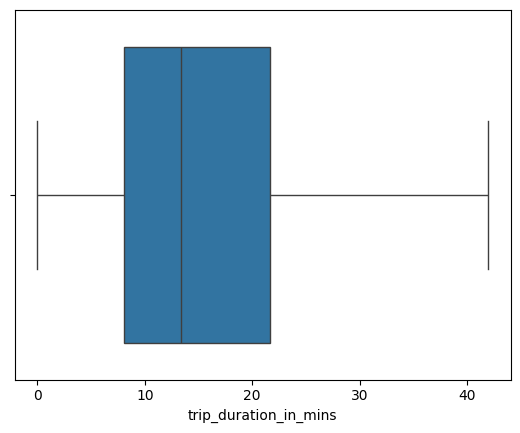

In [273]:
sns.boxplot(x=yellow_taxi_df['trip_duration_in_mins'])

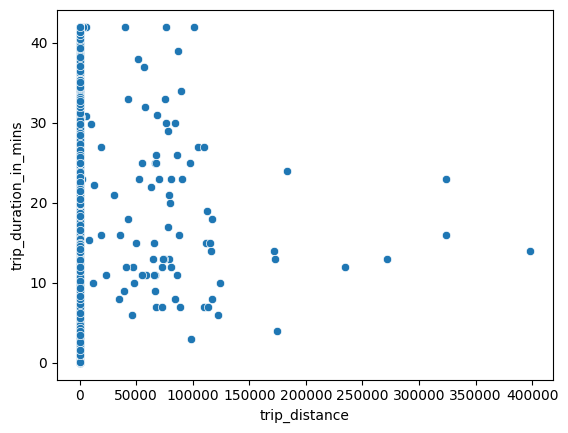

In [274]:
sns.scatterplot(x=yellow_taxi_df['trip_distance'], y=yellow_taxi_df['trip_duration_in_mins'])
plt.show()

The scatterplot above identifies a problem in the 'trip_distance' axis. This is because most of its values are present near the origin, which indicates that we haven't dealt with outliers in this Feature yet, as so with other features too. Thus, this will be covered next.

## Dealing with Outliers

### Trip Distance

<Axes: ylabel='trip_distance'>

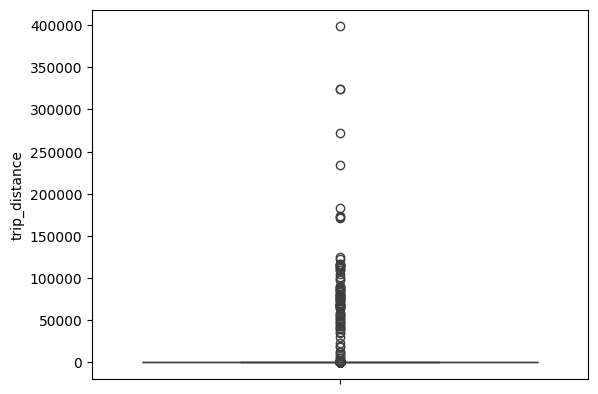

In [275]:
sns.boxplot(yellow_taxi_df, y='trip_distance')

Since distance can have rare long trips, thus making it skewed, we will use the IQR method to cap the outliers.

In [276]:
# Calculate IQR
Q1 = yellow_taxi_df['trip_distance'].quantile(0.25)  # 25th percentile
Q3 = yellow_taxi_df['trip_distance'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yellow_taxi_df['trip_distance'] = np.where(yellow_taxi_df['trip_distance'] > upper_bound, upper_bound, yellow_taxi_df['trip_distance'])
yellow_taxi_df['trip_distance'] = np.where(yellow_taxi_df['trip_distance'] < lower_bound, lower_bound, yellow_taxi_df['trip_distance'])

<Axes: ylabel='trip_distance'>

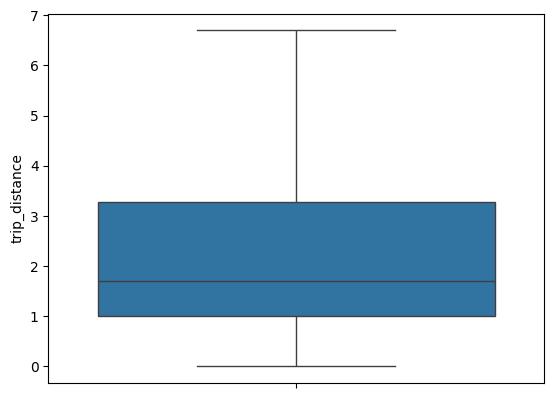

In [277]:
sns.boxplot(yellow_taxi_df, y='trip_distance')

### Passenger Count

<Axes: ylabel='passenger_count'>

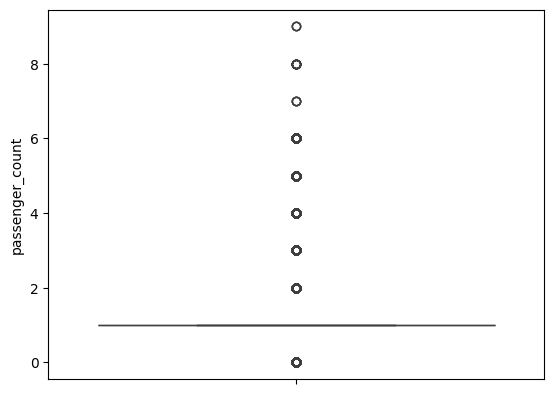

In [278]:
sns.boxplot(yellow_taxi_df, y='passenger_count')

Since Yellow taxis only allow up to 6 passengers, values above 6 are likely entry error, as well as trips with 0 passenger.

<Axes: ylabel='passenger_count'>

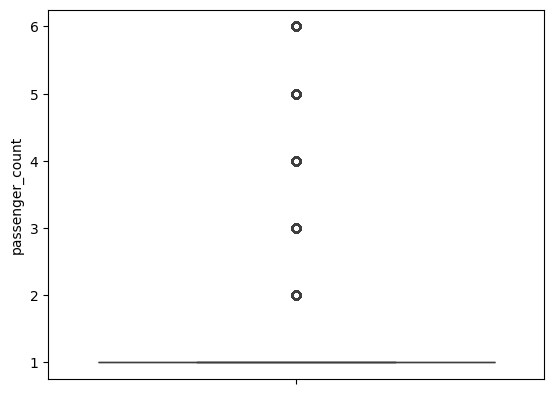

In [279]:
yellow_taxi_df = yellow_taxi_df[(yellow_taxi_df['passenger_count'] >= 1) & (yellow_taxi_df['passenger_count'] <= 6)]

sns.boxplot(yellow_taxi_df, y='passenger_count')

### Extra

<Axes: ylabel='extra'>

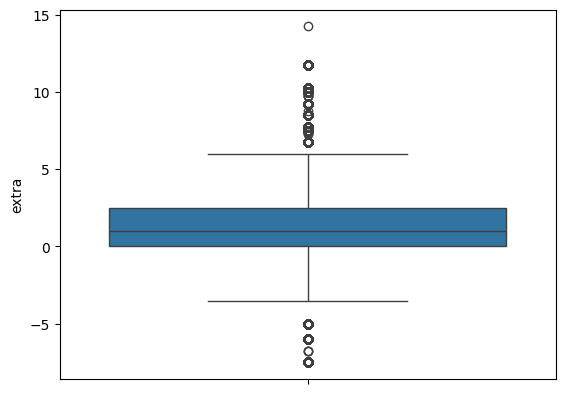

In [280]:
sns.boxplot(yellow_taxi_df, y='extra')

Negative values in 'extra' indicates reverse transactions, or refunds, thus we will not require this data. To handle this, first we look at the percentage of rows with such values.

In [281]:
print(f"Percentage of Rows with Negative Values in 'extra': {len(yellow_taxi_df.loc[yellow_taxi_df['extra'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'extra': 0.8931606790688971


<Axes: ylabel='extra'>

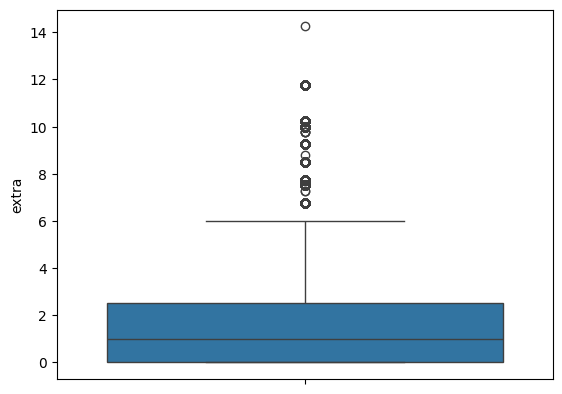

In [282]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['extra'] >= 0]
sns.boxplot(yellow_taxi_df, y='extra')

### Congestion Surcharge

<Axes: ylabel='congestion_surcharge'>

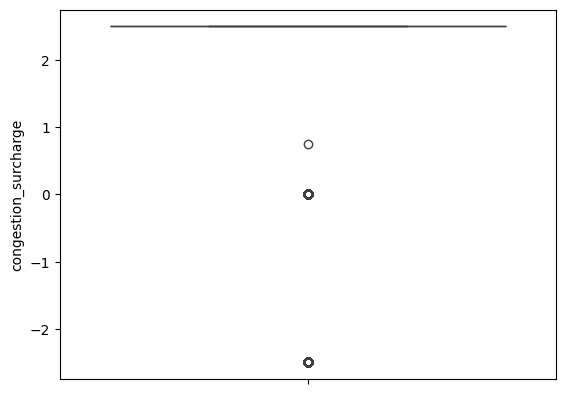

In [283]:
sns.boxplot(yellow_taxi_df, y='congestion_surcharge')

In [284]:
print(f"Percentage of Rows with Negative Values in 'extra': {len(yellow_taxi_df.loc[yellow_taxi_df['congestion_surcharge'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'extra': 0.8292090968428365


Here, we will only keep rows with whole numbers for 'congestion_surcharge'.

In [285]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['congestion_surcharge'] >= 0]

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


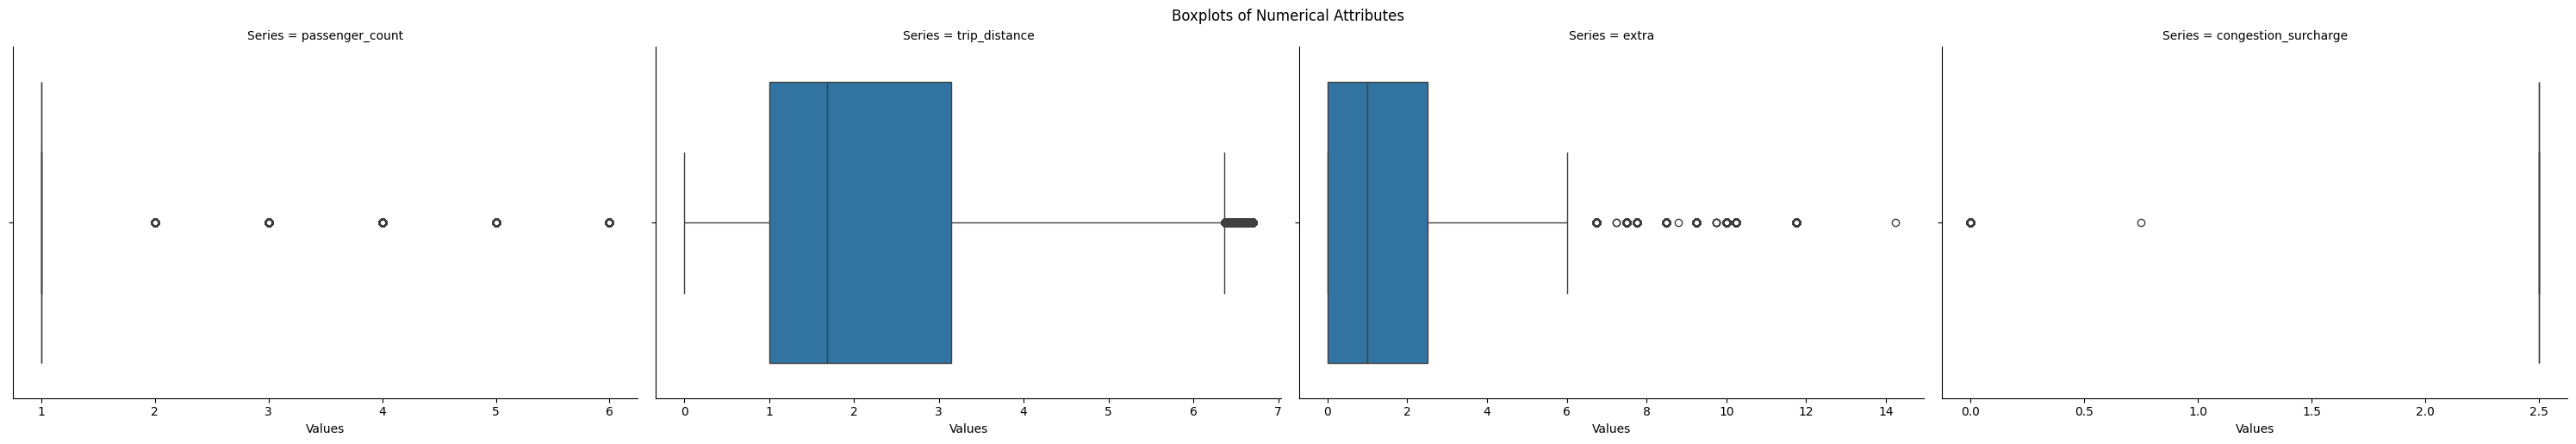

In [286]:
numerical_df = pd.DataFrame(yellow_taxi_df[['passenger_count','trip_distance','extra','congestion_surcharge']])

numerical_melted_df = numerical_df.melt(var_name='Series',value_name='Values')

graph = sns.FacetGrid(numerical_melted_df, col='Series', sharex=False, sharey=False, height=5, aspect=1.5, col_wrap=4)
graph.map(sns.boxplot, 'Values')
graph.fig.suptitle('Boxplots of Numerical Attributes', y=1.02)

plt.show()

## Correlation

<Axes: >

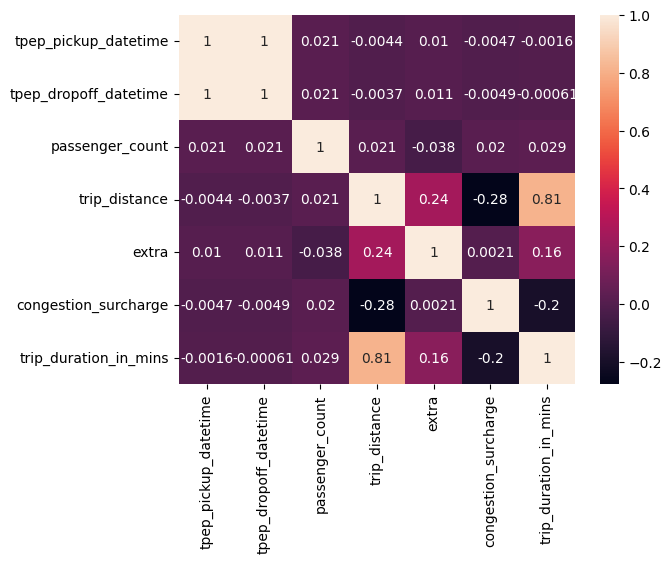

In [287]:
correlation = yellow_taxi_df.corr()

sns.heatmap(correlation, xticklabels=yellow_taxi_df.columns, yticklabels=yellow_taxi_df.columns, annot=True)

## Pairplot

Since 'congestion_surcharge' and 'passenger_count' are categorical features, we will not include them in this pairplot.

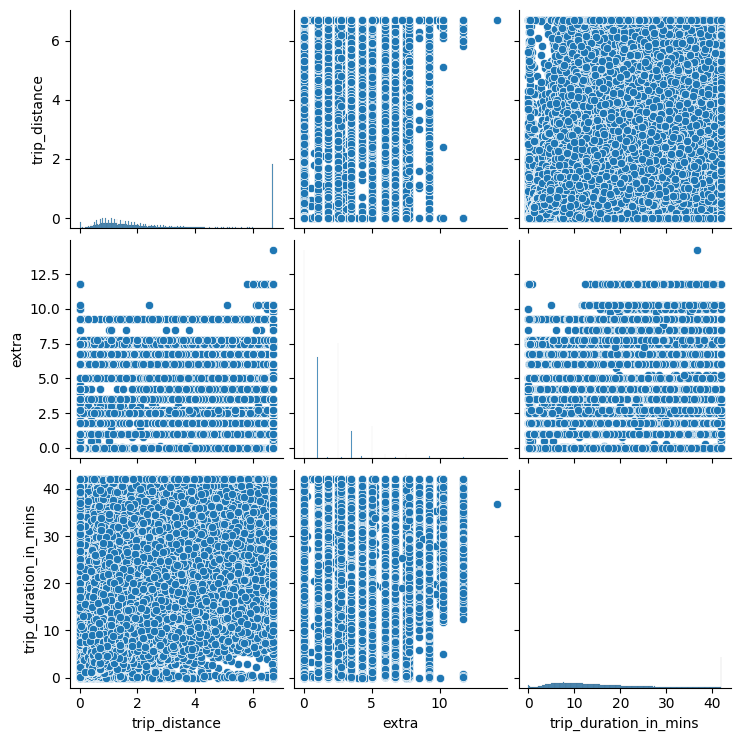

In [288]:
sns.pairplot(yellow_taxi_df, vars=['trip_distance','extra','trip_duration_in_mins'])

As you can see, the pairplot is very overwhelming. This is because there are around 3M rows in this dataset, which is impossible to show any trends in this pairplot. Thus, we will use a sample of 1000 from the dataset, instead. This is to see clearer trends in the pairplot.

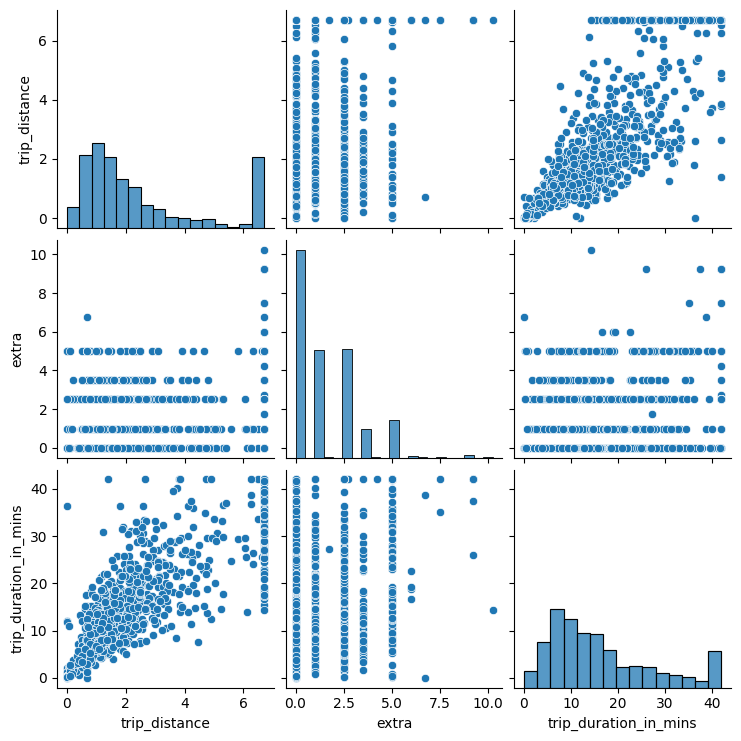

In [289]:
sample_df = yellow_taxi_df.sample(n=1000,random_state=42)

sns.pairplot(sample_df, vars=['trip_distance','extra','trip_duration_in_mins'])

In this pairplot, the graph of 'trip_duration_in_mins' against 'trip_distance' shows 

# Feature Engineering
## Building the Peak Times & Busy Days Features

#### Peak Times (Group By Hour)

To analyse the peak times and days, we will analyse the Pick-up Time from the 'tpep_pickup_datetime' variable, as it the number of trips started during peak times and on busy days. Otherwise, choosing Drop-off Time ('tpep_dropoff_datetime') would be inaccurate as trips may end at different times from the actual peak hours of the day.

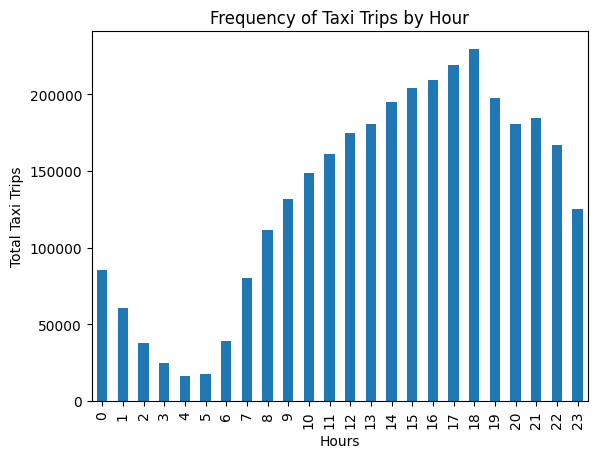

In [290]:
#Create a new column called 'hour' to extract the hour from each trip in the dataset
yellow_taxi_df['hour'] = yellow_taxi_df['tpep_pickup_datetime'].dt.hour

#Create a separate DataFrame to count the number of occurences per hour
peak_times_df = yellow_taxi_df.groupby('hour').size()

#Create a bar graph using the peak_times_df
peak_times_df.plot(kind='bar',x='hour',y='Value')

plt.xlabel('Hours')
plt.ylabel('Total Taxi Trips')
plt.title('Frequency of Taxi Trips by Hour')

plt.show()


From the graph above, we can observe that:

- NYC taxi services experience a noticeable increase in activity starting at 5 am, with the most significant rise in the number of trips occurring between 6 am and 7 am. This aligns with the typical rush hour, as people begin commuting to work or school. 

- The peak period of the day occurs at 6 pm, which corresponds with the evening rush, when people are likely leaving work and heading home or to other activities. 

- Following this, there is a sharp decline in taxi trips from 6 pm to 7 pm, which indicates that the demand for taxis decreases significantly after the peak commuting hours. This suggests that the bulk of taxi usage is tied to regular work hours and commuting patterns, with a clear drop-off in demand once people are settled at home or finished with their workday.

#### Busy Days of the Week (Group by Weekdays)

For the purpose of visualising the data for busy days, we will use the **.dt.day_name()** function. 

Though we can use **.dt.weekday** (returns from 0 - Monday to 6 - Saturday) for 'datetime' data types, the ML model will recognise this as continuous variable, instead of categorical. Thus, we will use one-hot-encoding for the newly created feature 'weekday' instead.

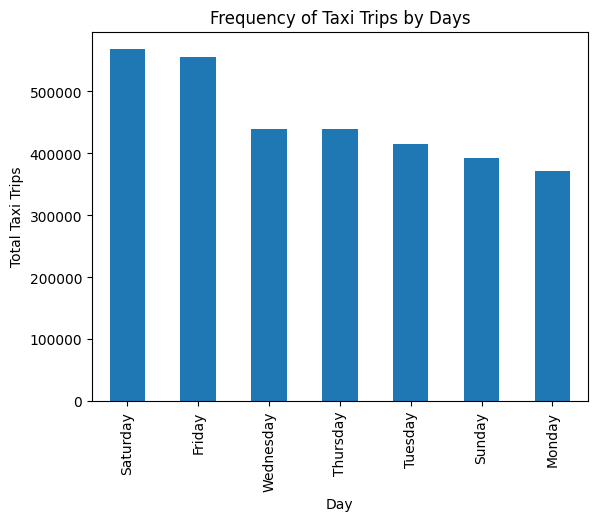

In [291]:
yellow_taxi_df['weekday'] = yellow_taxi_df['tpep_pickup_datetime'].dt.day_name()  # Extract weekday first

#Create a separate DataFrame to visualise the occurences of trips by weekday
busy_days_df = yellow_taxi_df.groupby('weekday').size()  # Count occurrences per day

#Sort by descending
busy_days_sorted_df = busy_days_df.sort_values(ascending=False)

#Create a bar graph
busy_days_sorted_df.plot(kind='bar',x='day',y='Value')

plt.xlabel('Day')
plt.ylabel('Total Taxi Trips')
plt.title('Frequency of Taxi Trips by Days')

plt.show()

Now that several features have been extracted from the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' variables, we will drop them for the purpose of the regression model.

In [292]:
yellow_taxi_df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1,inplace=True)

## Congestion Feature

In [293]:
yellow_taxi_df['congestion_index'] = yellow_taxi_df['extra'].apply(lambda x: 1 if x == 1 else 0) + yellow_taxi_df['congestion_surcharge']

yellow_taxi_df.drop(columns='congestion_surcharge',axis=1,inplace=True)

yellow_taxi_df['congestion_index'].describe()

count   3183070
mean          3
std           1
min           0
25%           2
50%           2
75%           2
max           4
Name: congestion_index, dtype: float64

In [294]:
yellow_taxi_df.sample(10)

,passenger_count,trip_distance,extra,trip_duration_in_mins,hour,weekday,congestion_index
2277594,1,2,0,16,10,Thursday,2
1506745,2,1,2,13,16,Thursday,2
2807419,1,1,2,10,19,Monday,2
1514495,1,1,2,9,17,Thursday,2
2975445,1,0,2,3,14,Wednesday,2
1208738,1,4,0,20,7,Tuesday,2
1634018,1,1,2,2,16,Friday,2
2208740,1,2,2,19,17,Wednesday,2
3060706,3,1,0,15,14,Thursday,2
976157,2,1,0,6,19,Saturday,2


<Axes: >

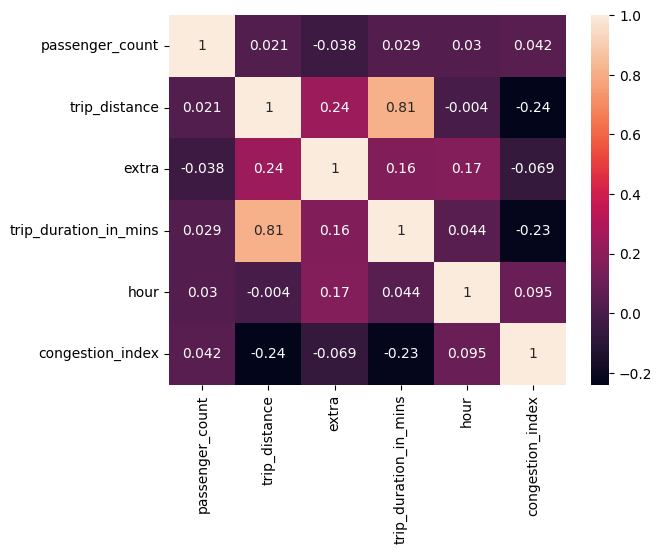

In [298]:
temp_df = yellow_taxi_df.drop(columns='weekday',axis=1)
correlation = temp_df.corr()

sns.heatmap(correlation, xticklabels=temp_df.columns, yticklabels=temp_df.columns, annot=True)

## One-Hot-Encoding

In [299]:
encoded_df = pd.get_dummies(yellow_taxi_df['weekday'], dtype=int)

encoded_df.sample(10)

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3090575,0,0,0,0,1,0,0
1295201,0,0,0,0,0,1,0
75985,1,0,0,0,0,0,0
1602196,1,0,0,0,0,0,0
3162074,1,0,0,0,0,0,0
544987,0,0,0,0,0,0,1
2877556,0,0,0,0,0,1,0
1566377,0,0,0,0,1,0,0
2786120,0,1,0,0,0,0,0
3089983,0,0,0,0,1,0,0


In [300]:
yellow_taxi_df = yellow_taxi_df.join(encoded_df)

yellow_taxi_df.drop('weekday',axis=1,inplace=True)

## Sine Encoding

Since the 'hour' variable is cyclical in nature, where 23 is close to 0, sine encoding should be applied. Without this step, the cyclical relationship between hours will not be captured, as these numbers (hours) do not inherently represent the cyclic nature of the day.

In [301]:
yellow_taxi_df['hour_sin'] = np.sin(2 * np.pi * yellow_taxi_df['hour'] / 24)
yellow_taxi_df['hour_cos'] = np.cos(2 * np.pi * yellow_taxi_df['hour'] / 24)

yellow_taxi_df.drop('hour',axis=1,inplace=True)

In [302]:
pd.options.display.float_format = '{:.4f}'.format

yellow_taxi_df.sample(10)

,passenger_count,trip_distance,extra,trip_duration_in_mins,congestion_index,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour_sin,hour_cos
1226772,1.0000,2.1100,0.0000,21.7333,2.5000,0,0,0,0,0,1,0,0.5000,-0.8660
1576686,1.0000,1.2700,1.0000,4.0833,3.5000,1,0,0,0,0,0,0,0.9659,0.2588
2993779,2.0000,1.3800,2.5000,12.5500,2.5000,0,0,0,0,0,0,1,-0.8660,-0.5000
202422,2.0000,1.1800,0.0000,5.9333,2.5000,0,0,1,0,0,0,0,-1.0000,-0.0000
2112835,1.0000,0.5000,3.5000,4.3167,2.5000,0,0,0,0,0,1,0,-0.7071,0.7071
2651558,5.0000,6.7000,0.0000,28.4667,2.5000,0,0,0,1,0,0,0,0.9659,-0.2588
2364143,1.0000,1.9000,3.5000,11.8667,2.5000,0,0,0,0,1,0,0,-0.7071,0.7071
162658,1.0000,4.5700,0.0000,28.3333,2.5000,0,0,1,0,0,0,0,0.0000,-1.0000
789504,1.0000,0.9500,0.0000,6.8500,2.5000,1,0,0,0,0,0,0,0.7071,-0.7071
618537,2.0000,1.2000,2.5000,10.3167,2.5000,0,0,0,0,0,0,1,-0.9659,0.2588


# Building the Prediction Model & Performance Test

## Train-Test-Split

In [328]:
# define the training set ([x_train,y_train] pairs) where indepedent and dependent variables listed above:

x = yellow_taxi_df.drop(columns='trip_duration_in_mins',axis=1) #all columns except trip_duration_in)mins
y = yellow_taxi_df['trip_duration_in_mins']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# reshape(-1,1) y_train (this is not necessary for x_train, since it's multi-Dimensional now):
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

# define the test set ([x_test,y_test] pairs) where indepedent and dependent variables listed above:
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

## Simple Linear Regression

In [330]:
# define a LinearRegression model and train (i.e. fit) the model using training set:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# We will now assess the model performance with the test set.
# first, predict the price for test set using the model trained above:
Y_pred = linear_model.predict(X_test)

# Find the RMSE for the test set:
RMSE_multireg = metrics.root_mean_squared_error(Y_test, Y_pred)
print("RMSE_multireg: ", RMSE_multireg)

# Calculate R^2 score for the test set
R2 = metrics.r2_score(Y_test, Y_pred)

# Calculate Adjusted R^2
n = len(Y_test)  # number of observations
p = X_test.shape[1]  # number of features (predictors)
AdjR2_multi_reg = 1 - (1 - R2) * (n - 1) / (n - p - 1)
print("AdjR2_multi_reg: ", AdjR2_multi_reg)

RMSE_multireg:  5.970452495235559
AdjR2_multi_reg:  0.6990942129680981


## Random Forest Regression

### Hyperparameter Tuning

Since the dataset is slightly large (3M rows), it might be better to sample the training set, instead of using all of the data for hyperparameter optimisation.

In [325]:
# sampling 20% of dataset for hyperparameter tuning
X_train_sample, _ , Y_train_sample, _ = train_test_split(X_train, Y_train, test_size=0.9, random_state=42)

# Hyperparameters to test
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': randint(3, 20)  # Random sampling between 3 and 20
}

# Initialise the model
reg_model = RandomForestRegressor(random_state=42)

# Perform GridSearch with CV k-Fold for Regression
grid_search = RandomizedSearchCV(
    estimator=reg_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train_sample, Y_train_sample)

# Obtain the best parameter and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)

Best Parameters: {'max_depth': 12, 'n_estimators': 100}
Best CV Score: 0.754198112569926


### Training and Testing

In [333]:
# Initialise Random Forest Classifier
reg_model = RandomForestRegressor(n_estimators=100, max_depth=12,random_state=42)

# Train the model
reg_model.fit(X_train, Y_train)

# Make predictions on the test data
reg_Y_pred = reg_model.predict(X_test)

KeyboardInterrupt: 

### Performance Metrics

In [332]:
# R^2 Score
print(f'RSME: {metrics.mean_squared_error(Y_test, reg_Y_pred):.4f}')
print(f'R^2 Score: {metrics.r2_score(Y_test, reg_Y_pred):.4f}')

RSME: 28.5249
R^2 Score: 0.7592


There's a 8.61% increase in the model performance of Random Forest Regression with Hyperparameter Optimisation, as compared to the Simple Regression model done previously.

## XGBoost

Installing XGBoost

In [334]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importing XGBoost

In [340]:
import xgboost as xgb

### Hyperparameter Tuning

In [351]:
param_grid = {
    'n_estimators':[50,100,200,300],
    'max_depth':[3,5,7,9,11],
    'learning_rate': [0.01,0.1,0.2],
}

xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sample, Y_train_sample)

print("Best Parameters:", grid_search.best_params_)
print(f"Best RMSE from CV: {-grid_search.best_score_:.4f}")

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best RMSE from CV: 28.3311


### Training & Testing

In [352]:
xgb_model = xgb.XGBRegressor(n_estimators=300,learning_rate=0.1,max_depth=5,random_state=42)

xgb_model.fit(X_train, Y_train)

xgb_y_pred = xgb_model.predict(X_test)

### Performance Metrics

In [354]:
print(f"Mean Squared Error: {metrics.mean_squared_error(Y_test, xgb_y_pred):.4f}")
print(f"R^2 Score:{metrics.r2_score(Y_test,xgb_y_pred):.4f}")

Mean Squared Error: 28.2538
R^2 Score:0.7615


The model performance increased by 1.57% using XGBoost, when compared to Random Forest.

And, it increased by 8.86% using XGBoost, when compared to Simple Regression.